<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/1103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.11 模型选择、欠拟合和过拟合

In [0]:
!pip install mxnet d2lzh

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn

In [0]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5 
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [95]:
features[:2]


[[ 0.1816556 ]
 [-0.63245696]]
<NDArray 2x1 @cpu(0)>

In [96]:
poly_features[:2]


[[ 0.1816556   0.03299876  0.00599441]
 [-0.63245696  0.4000018  -0.25298393]]
<NDArray 2x3 @cpu(0)>

In [97]:
labels[:2]


[5.146566  1.4254713]
<NDArray 2 @cpu(0)>

In [0]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [0]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(), '\nbias:', net[0].bias.data().asnumpy())


final epoch: train loss 0.0040140944 test loss 0.005357087
weight: [[ 1.2035367 -3.3879864  5.595104 ]] 
bias: [4.977484]


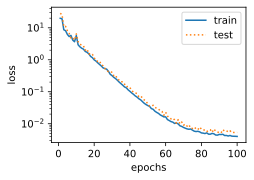

In [100]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 170.5034 test loss 183.81377
weight: [[23.51287]] 
bias: [3.3908281]


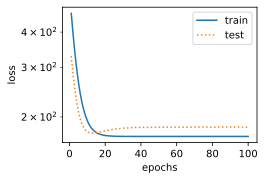

In [101]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 2.3033557 test loss 391.29297
weight: [[ 0.31472465  0.09968161 -0.00933794]] 
bias: [2.0942936]


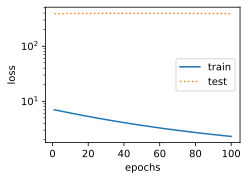

In [102]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])

In [0]:
%matplotlib inline 
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [105]:
features[0], labels[0]

(
 [0.8208568  0.21493697]
 <NDArray 2 @cpu(0)>, 
 [5.0867815]
 <NDArray 1 @cpu(0)>)

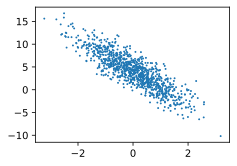

In [106]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [107]:
# len(features)
print(random.shuffle(list(range(10))))

None


In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)


In [109]:
batch_size = 10 

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.29187757  0.98311704]
 [-1.1017848  -1.1164639 ]
 [-0.27563417  1.5168767 ]
 [-2.3052864  -0.8243812 ]
 [ 1.4476801   0.74850816]
 [-0.9288544  -0.01012797]
 [ 0.5672225  -1.0133439 ]
 [ 0.674485   -0.5761929 ]
 [-2.008572    0.8848376 ]
 [ 0.47415277 -0.8507774 ]]
<NDArray 10x2 @cpu(0)> 
[ 0.26157156  5.804421   -1.5193472   2.3983386   4.539287    2.3718019
  8.776412    7.512675   -2.8187766   8.036687  ]
<NDArray 10 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [111]:
w.attach_grad
b.attach_grad 

<bound method NDArray.attach_grad of 
[0.]
<NDArray 1 @cpu(0)>>

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size 

In [0]:
lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))


## 3.3 线性回归的简洁实现

In [0]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
from mxnet.gluon import data as gdata 

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [117]:
for X, y in data_iter:
    print(X, y)
    break


[[-0.23539764  0.6447937 ]
 [-0.2078483   0.90913844]
 [ 0.79349494  0.58542407]
 [ 2.7504392   1.4042664 ]
 [-0.10717125  0.79039854]
 [ 2.1810858   1.8891623 ]
 [-0.29291564  0.5742522 ]
 [ 0.7726559   0.47493884]
 [-0.9688528   0.1770301 ]
 [ 1.1270262  -1.1154262 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.5315362  0.6750592  3.7886255  4.920602   1.3204547  2.1565669
  1.6625717  4.131741   1.6629494 10.237064 ]
<NDArray 10 @cpu(0)>


In [0]:
from mxnet.gluon import nn 

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01))

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [123]:
num_epochs = 3 
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.028785
epoch 2, loss: 0.000099
epoch 3, loss: 0.000048


In [124]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 1.9996848 -3.400023 ]]
 <NDArray 1x2 @cpu(0)>)

In [125]:
true_b, dense.bias.data()

(4.2, 
 [4.199382]
 <NDArray 1 @cpu(0)>)

## 3.12 权重衰减

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn 

n_train, n_test, num_inputs = 20, 100, 200 
true_w, true = nd.ones((num_inputs, 1)) * 0.01, 0.05 

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [0]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1, ))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [0]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [0]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().asscalar())
    
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', loss, 
            range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

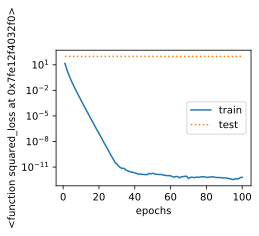

L2 norm of w: 14.588264


In [130]:
fit_and_plot(lambd=0)

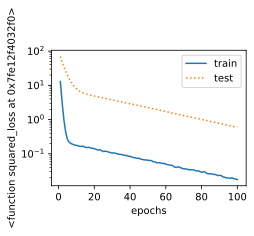

L2 norm of w: 0.28940323


In [131]:
fit_and_plot(lambd=3)

In [0]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd', {'learning_rate': lr, 'wd': wd})
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd', {'learning_rate': lr})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss', range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('L2 norma of w:', net[0].weight.data().norm().asscalar())


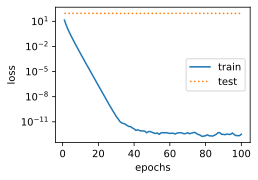

L2 norma of w: 12.639709


In [133]:
fit_and_plot_gluon(0)

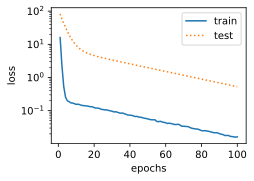

L2 norma of w: 0.27185556


In [134]:
fit_and_plot_gluon(3)

## 3.13 丢弃法

In [0]:
import d2lzh as d2l
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import loss as gloss, nn 

def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1 
    keep_prob = 1 - drop_prob 
    if keep_prob == 0:
        return X.zeros_like()
    mask = nd.random.uniform(0, 1, X.shape) < keep_prob
    return mask * X / keep_prob 

In [136]:
X = nd.arange(16).reshape((2, 8))
dropout(X, 0)


[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
<NDArray 2x8 @cpu(0)>

In [137]:
dropout(X, 0.5)


[[ 0.  2.  4.  6.  8. 10.  0. 14.]
 [16.  0.  0. 22.  0. 26.  0.  0.]]
<NDArray 2x8 @cpu(0)>

In [138]:
dropout(X, 0.8)


[[ 0.  0.  0.  0.  0.  0.  0. 35.]
 [ 0.  0.  0.  0.  0. 65.  0.  0.]]
<NDArray 2x8 @cpu(0)>

In [139]:
dropout(X, 1)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
<NDArray 2x8 @cpu(0)>

In [0]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256 

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens1))
b1 = nd.zeros(num_hiddens1)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens1, num_hiddens2))
b2 = nd.zeros(num_hiddens2)
W3 = nd.random.normal(scale=0.01, shape=(num_hiddens2, num_outputs))
b3 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2, W3, b3]
for param in params:
    param.attach_grad()

In [0]:
drop_prob1, drop_prob2 = 0.2, 0.5 

def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = (nd.dot(X, W1) + b1).relu()
    if autograd.is_training():
        H1 = dropout(H1, drop_prob1)
    H2 = (nd.dot(H1, W2) + b2).relu()
    if autograd.is_training():
        H2 = dropout(H2, drop_prob1)
    return nd.dot(H2, W3) + b3 

In [142]:
num_epochs, lr, batch_size = 5, 0.5, 256 

loss = gloss.SoftmaxCrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 1.1582, train acc 0.552, test acc 0.783
epoch 2, loss 0.5649, train acc 0.791, test acc 0.830
epoch 3, loss 0.4748, train acc 0.826, test acc 0.852
epoch 4, loss 0.4336, train acc 0.841, test acc 0.863
epoch 5, loss 0.4054, train acc 0.851, test acc 0.859


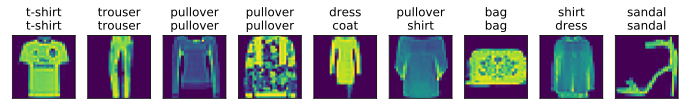

In [143]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

In [0]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'), 
    nn.Dropout(drop_prob1), 
    nn.Dense(256, activation='relu'), 
    nn.Dropout(drop_prob2), 
    nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [145]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 1.1147, train acc 0.570, test acc 0.790
epoch 2, loss 0.5781, train acc 0.788, test acc 0.842
epoch 3, loss 0.4825, train acc 0.825, test acc 0.856
epoch 4, loss 0.4466, train acc 0.838, test acc 0.849
epoch 5, loss 0.4154, train acc 0.847, test acc 0.867


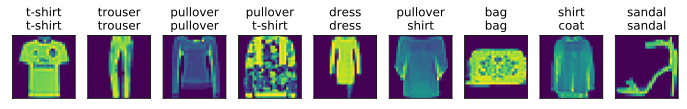

In [146]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

## 3.16 实战 kaggle 比赛：房价预测

In [0]:
from google.colab import files 
uploaded = files.upload()

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import data as gdata, loss as gloss, nn 
import numpy as np 
import pandas as pd 

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [151]:
train_data.shape 

(1460, 81)

In [152]:
test_data.shape 

(1459, 80)

In [153]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [0]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [0]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index 
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [156]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [0]:
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data.SalePrice.values).reshape((-1, 1))

In [0]:
loss = gloss.L2Loss()

def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    return net 

In [0]:
def log_rmse(net, features, labels):
    clipped_preds = nd.clip(net(features), 1, float('inf'))
    rmse = nd.sqrt(2 * loss(clipped_preds.log(), labels.log()).mean())
    return rmse.asscalar()

In [0]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate, 'wd': weight_decay})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [0]:
def get_k_fold_data(k, i, X, y):
    assert k > 1  
    fold_size = X.shape[0] // k 
    X_train, y_train = None, None 
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part 
        else:
            X_train = nd.concat(X_train, X_part, dim=0)
            y_train = nd.concat(y_train, y_part, dim=0)
    return X_train, y_train, X_valid, y_valid

In [0]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0 
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'rmse', range(1, num_epochs+1), valid_ls, ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f' % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

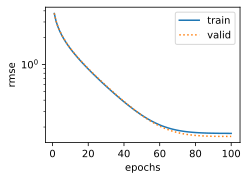

fold 0, train rmse 0.169755, valid rmse 0.157051
fold 1, train rmse 0.162174, valid rmse 0.188838
fold 2, train rmse 0.163699, valid rmse 0.168018
fold 3, train rmse 0.168150, valid rmse 0.154837
fold 4, train rmse 0.162961, valid rmse 0.182832
5-fold validation: avg train rmse 0.165348, avg valid rmse 0.170315


In [163]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64 
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f' % (k, train_l, valid_l))

In [0]:
def train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)
    d2l.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).asnumpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

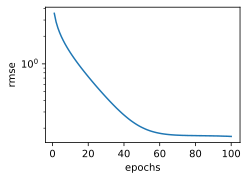

train rmse 0.162522


In [165]:
train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size)